In [4]:
import numpy as np
import matplotlib.pyplot as plt

from simons_array_python import sa_hwp
from simons_array_python import sa_pipeline_filters as sa_pf
from simons_array_python import sa_pipeline_inputs as sa_pi
from simons_array_python import sa_observation as sa_ob
from simons_array_python import sa_common_numerical as sa_cn
from simons_array_python import sa_timestream_operators as sa_op

In [30]:
sa_op.gen_bolo_list(return_rns=False)[-400:-350]

['13.31_36.90B',
 '13.31_16.90B',
 '13.31_5.90T',
 '13.31_5.90B',
 '13.31_14.90B',
 '13.31_96.90B',
 '13.31_110.90B',
 '13.31_44.90T',
 '13.31_58.90T',
 '13.31_59.90B',
 '13.31_73.90T',
 '13.31_58.90B',
 '13.31_74.90B',
 '13.31_74.90T',
 '13.31_75.90B',
 '13.31_18.90T',
 '13.31_7.90B',
 '13.31_118.90B',
 '13.31_69.90B',
 '13.31_79.90T',
 '13.31_79.90B',
 '13.31_65.90T',
 '13.31_50.90B',
 '13.31_40.90T',
 '13.31_68.90T',
 '13.31_51.90T',
 '13.31_66.90B',
 '13.31_109.90B',
 '13.31_57.90T',
 '13.31_86.90B',
 '13.31_103.90B',
 '13.31_106.90D',
 '13.31_88.90B',
 '13.31_88.90T',
 '13.31_89.90B',
 '13.31_89.90T',
 '13.31_90.90B',
 '13.31_137.90D',
 '13.31_91.90B',
 '13.31_43.90T',
 '13.31_43.90B',
 '13.31_10.90T',
 '13.31_69.90T',
 '13.31_42.90B',
 '13.31_55.90T',
 '13.31_42.90T',
 '13.31_8.90B',
 '13.31_8.90T',
 '13.31_18.90B',
 '13.31_98.90T']

In [19]:
sa_data = sa_ob.create_data_from_IDs(
    
    #(22300755, 10), #good encoder
    (22300714, 11), #moon
#     (22300935, 0) # RCW38
#     (22300625,8), #tauA
)
for obs in sa_data.obs:
#     obs.detectors = ['13.13_175.90B', '13.13_195.90T'] #Kyohei dets for rcw38
#     obs.detectors = ['13.13_189.90B'] #good moon detector
    obs.detectors = sa_op.gen_bolo_list(return_rns=False)[-400:-350]

#     obs.load_calibratable_list()
#     obs.detectors=obs.detectors[0:50]
    obs.load_metadata()

In [20]:
%%capture
pi = sa_pi.InputLevel0CachedByObsID(
    all_detectors = obs.detectors,
    n_per_cache = 100,
    readout_phase = 'I',
    load_slowdaq = False,
    load_hwp = False,
    load_dets = True, 
    load_g3 = True,
    load_gcp = True,
    ignore_faulty_frame = True,
    record_frame_time = False,
    ts_rounding_error=1e+10,
)

sa_operator_stack = sa_pf.OperatorComposite(
#     sa_hwp.HWPSignalFilter(demod_modes=[0, 4], decimate_factor=1),
#     sa_hwp.HWPAngleCalculator(encoder_reference_angle=0),
#     sa_pf.OperatorRemoveTODMean(),
    sa_pf.OperatorDataInitializer(pi),
)
sa_operator_stack.exec(sa_data)

INFO: Applying pipeline filter: <class 'simons_array_python.sa_pipeline_filters.OperatorDataInitializer'>
Loading data from g3 files for run_id=22300714, run_subid=11 . . . 


In [21]:
tod = sa_data.obs[0].tod_list[0]

['13.31_36.90B', '13.31_74.90B', '13.31_74.90T', '13.31_75.90B', '13.31_79.90T', '13.31_79.90B', '13.31_65.90T', '13.31_50.90B', '13.31_106.90D', '13.31_88.90B', '13.31_88.90T', '13.31_89.90B', '13.31_89.90T', '13.31_90.90B', '13.31_137.90D', '13.31_91.90B', '13.31_98.90T']


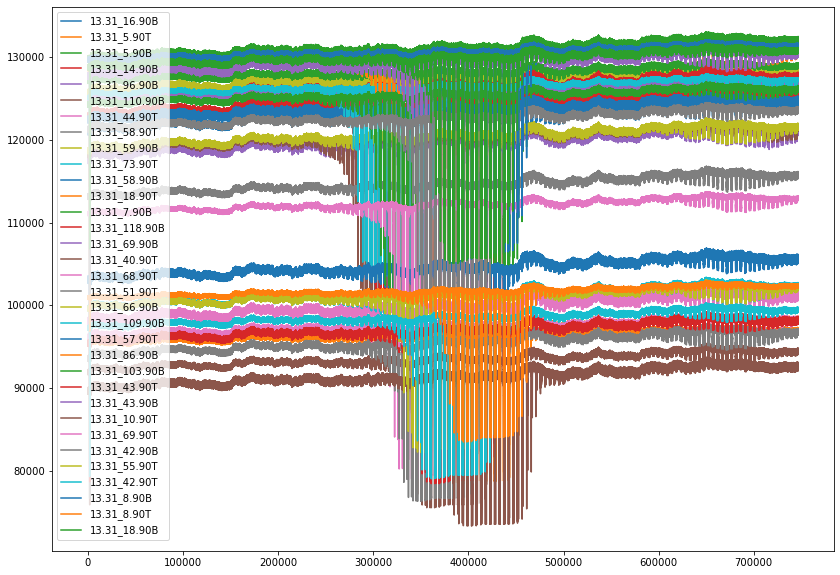

In [29]:
bad = []
plt.figure(figsize=(14,10))
for det in obs.detectors:
    raw = tod.read(f'{det}-I')
    if raw is None:
        bad.append(str(det))
        continue
    plt.plot(raw, label=f'{det}')
plt.legend(loc='upper left')
print(bad)

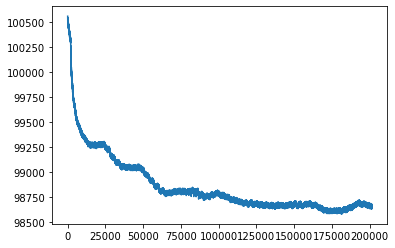

In [62]:
raw = tod.read('13.13_175.90B-I')
plt.plot(raw)

In [32]:
# plt.figure(figsize=(14,10))
# for det in obs.detectors:
#     ts = tod.read(f'demod4r_{det}-I')
#     plt.plot(np.real(ts), label=f'{det}')
# plt.legend(loc='upper left')

In [33]:
# plt.figure(figsize=(14,10))
# for det in obs.detectors:
#     ts = tod.read(f'demod4i_{det}-I')
#     plt.plot(np.real(ts), label=f'{det}')
# plt.legend(loc='upper left')